In [109]:
import numpy as np 
import cv2
import os
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.manifold import TSNE
import random

## Oxford:

In [2]:
def load_test_data(images_path, gt_path):
    test_images_path = []
    test_names = []
    test_gray_images = []
    test_colour_images = []
    
    for filename in sorted(os.listdir(gt_path)):
        if filename.endswith("query.txt"):

            # Saving filename
            tmp = filename.split(".")[0].split("_")
            if len(tmp) == 4:
                name = tmp[0]+"_"+tmp[1]
            elif len(tmp) == 3:
                name = tmp[0]
            test_names.append(name)

            # Reading the image number to be saved
            with open(os.path.join(gt_path, filename), "r") as f:
                line = f.readline()
                test_images_path.append(line.split(" ")[0])

    for path in test_images_path:
        image = cv2.imread(os.path.join(images_path, path[5:]) + ".jpg")
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        test_gray_images.append(gray_image)
        test_colour_images.append(image)
    
    #print("Loaded in {} Images!".format(len(test_gray_images)))
    
    return test_gray_images, test_colour_images, test_names

In [3]:
def load_train_data(images_path, gt_path):
    train_names = []
    train_images_path = []
    train_gray_images = []
    train_colour_images = []

    all_image_names = []

    for filename in sorted(os.listdir(gt_path)):
        if filename.endswith("good.txt") or filename.endswith("ok.txt"):

            # Saving filenames
            tmp = filename.split(".")[0].split("_")
            if len(tmp) == 4:
                name = tmp[0]+"_"+tmp[1]
            elif len(tmp) == 3:
                name = tmp[0]

            # Saving image paths
            with open(os.path.join(gt_path, filename), "r") as f:
                line = f.readlines()
                for i in range(len(line)):
                    line[i] = line[i][:-1]
                    # Check if image has already been added:
                    if line[i] not in all_image_names:
                        # Append this many names
                        train_names.append(name)
                        train_images_path.append(line[i])
                        all_image_names.append(line[i])

    for path in train_images_path:
        image = cv2.imread(os.path.join(images_path, path) + ".jpg")
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        train_gray_images.append(gray_image)
        train_colour_images.append(image)
    
    #print("Loaded in {} Images!".format(len(train_gray_images)))
    
    return train_gray_images, train_colour_images, train_names

In [4]:
def find_pixel_values(test_gray_images, train_gray_images):
    test_pixels = []
    for image in test_gray_images:
        img = Image.fromarray(image)
        img = img.resize((100,100))
        img = np.array(img)
        img = img.reshape((10000,))
        test_pixels.append(img)

    train_pixels = []
    for image in train_gray_images:
        img = Image.fromarray(image)
        img = img.resize((100,100))
        img = np.array(img)
        img = img.reshape((10000,))
        train_pixels.append(img)
    
    return test_pixels, train_pixels

In [88]:
def load_oxford_data(vocab_size):
    # Load in data x No. of words:
    train_bovw = np.load("SIFT/NPY files for BoVW/bovw files for {} Words/BoW_Train.npy".format(vocab_size))
    test_bovw = np.load("SIFT/NPY files for BoVW/bovw files for {} Words/BoW_Test.npy".format(vocab_size))

    # Load in all images (training, testing)
    images_path = r"C:\Users\Sean\Desktop\University Yr2\project\Image-Retrival (clean)\SIFT\Oxford building images"
    gt_path = r"C:\Users\Sean\Desktop\University Yr2\project\Image-Retrival (clean)\SIFT\Ground Truth files"
    train_gray_images, train_colour_images, train_names = load_train_data(images_path, gt_path)
    
    return train_bovw, test_bovw, train_colour_images, train_names

In [91]:
def tSNE_Oxford(vocab_size):
    # load in data
    train_bovw, test_bovw, train_colour_images, train_names = load_oxford_data(vocab_size)
    
    # create tsne
    tsne = TSNE(random_state=42)
    X_tsne = tsne.fit_transform(train_bovw)
    
    # convert names to integers for graphing function:
    names = []
    y = []
    counter = []
    count = -1
    start = 0
    for i in train_names:
        if i not in names:
            counter.append(start)
            start = 0
            names.append(i)
            count += 1
        start += 1
        y.append(count)
    counter.append(start)

    # Plot output:
    colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525", "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E", "blue"]

    plt.figure(figsize=(10, 10))
    plt.xlim(X_tsne[:, 0].min(), X_tsne[:, 0].max() + 1)
    plt.ylim(X_tsne[:, 1].min(), X_tsne[:, 1].max() + 1)

    for i in range(len(X_tsne)):
        plt.text(X_tsne[i, 0], X_tsne[i, 1], str(y[i]), color = colors[y[i]], fontdict={'weight': 'bold', 'size': 9})

    plt.title("t-SNE for Oxford5k w. {} Words".format(vocab_size))

    plt.ylabel("t-SNE feature 0")
    plt.xlabel("t-SNE feature 1")
    plt.show()
    
    # print information relating to plot:
    print("NAME \t\t\t NUMBER \t COUNT")
    for idx, name, count in zip(range(len(names)), names, counter[1:]):
        if idx == 7:
            print(name, "\t\t\t", idx, "\t\t", count)
        elif idx == 10:
            print(name, "\t", idx, "\t\t", count)
        else:
            print(name, "\t\t", idx, "\t\t", count)

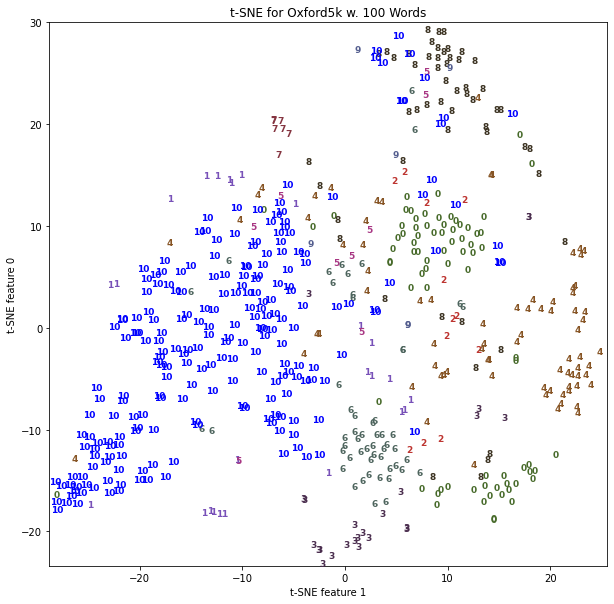

NAME 			 NUMBER 	 COUNT
all_souls 		 0 		 78
ashmolean 		 1 		 25
balliol 		 2 		 12
bodleian 		 3 		 24
christ_church 		 4 		 78
cornmarket 		 5 		 9
hertford 		 6 		 54
keble 			 7 		 7
magdalen 		 8 		 54
pitt_rivers 		 9 		 6
radcliffe_camera 	 10 		 220


In [93]:
tSNE_Oxford(vocab_size=100)

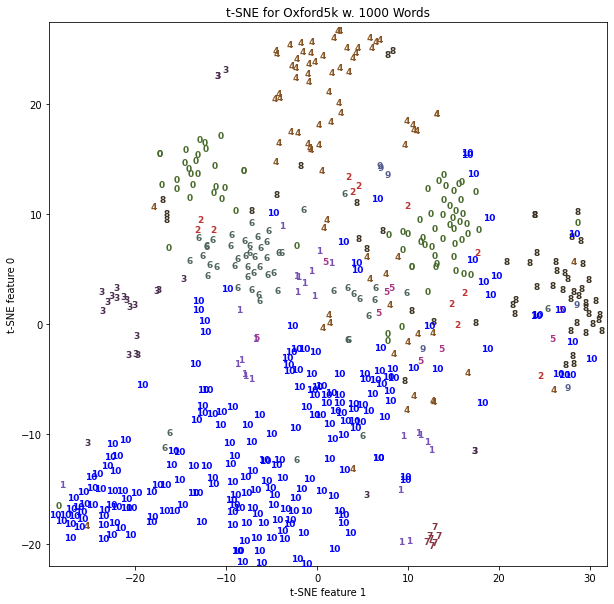

NAME 			 NUMBER 	 COUNT
all_souls 		 0 		 78
ashmolean 		 1 		 25
balliol 		 2 		 12
bodleian 		 3 		 24
christ_church 		 4 		 78
cornmarket 		 5 		 9
hertford 		 6 		 54
keble 			 7 		 7
magdalen 		 8 		 54
pitt_rivers 		 9 		 6
radcliffe_camera 	 10 		 220


In [94]:
tSNE_Oxford(vocab_size=1000)

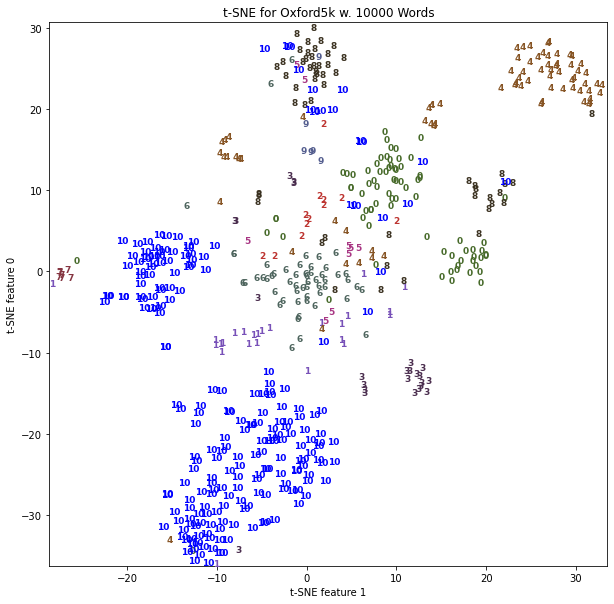

NAME 			 NUMBER 	 COUNT
all_souls 		 0 		 78
ashmolean 		 1 		 25
balliol 		 2 		 12
bodleian 		 3 		 24
christ_church 		 4 		 78
cornmarket 		 5 		 9
hertford 		 6 		 54
keble 			 7 		 7
magdalen 		 8 		 54
pitt_rivers 		 9 		 6
radcliffe_camera 	 10 		 220


In [95]:
tSNE_Oxford(vocab_size=10000)

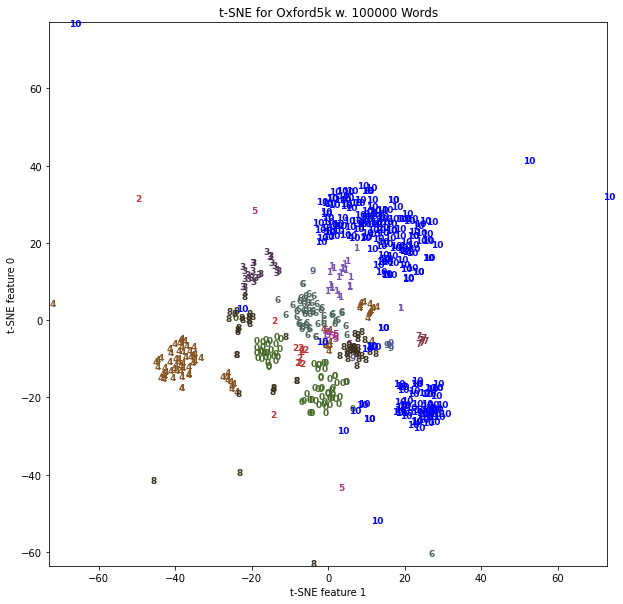

NAME 			 NUMBER 	 COUNT
all_souls 		 0 		 78
ashmolean 		 1 		 25
balliol 		 2 		 12
bodleian 		 3 		 24
christ_church 		 4 		 78
cornmarket 		 5 		 9
hertford 		 6 		 54
keble 			 7 		 7
magdalen 		 8 		 54
pitt_rivers 		 9 		 6
radcliffe_camera 	 10 		 220


In [96]:
tSNE_Oxford(vocab_size=100000)

## MPEG7:

In [97]:
def load_MPEG7_data(folder, image_type, gray=False):
    images = []
    filenames = []
    y = []
    category, idx = "none", 0
    for filename in sorted(os.listdir(folder)):
        if filename.endswith(image_type):
            if image_type == ".gif":
                gif_image = cv2.VideoCapture(os.path.join(folder, filename))
                ret, frame = gif_image.read()
                image = Image.fromarray(frame)
                image = image.resize((64, 64), Image.ANTIALIAS)
                image = np.array(image)
            else:
                image = cv2.imread(os.path.join(folder, filename))
            if gray:
                gray_image = image
            else:
                gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            if gray_image is not None:
                images.append(gray_image)
                split_name = filename.split('_')
                if len(split_name) == 3:
                    fname = filename.split('_')[0] + "_" + filename.split('_')[1]
                elif len(split_name) == 2:
                    fname = filename.split('_')[0]
                elif len(split_name) == 1:
                    fname = filename.split('-')[0]
                filenames.append(fname)
                if filename.startswith(category):
                    y.append(idx)
                else:
                    split = filename.split('_')
                    if len(split) == 3:
                        category = filename.split('_')[0] + "_" + filename.split('_')[1]
                    elif len(split) == 2:
                        category = filename.split('_')[0]
                    idx = idx + 1
                    y.append(idx)
    #print(len(images), "Images loaded successfully!")
    return images, filenames

In [98]:
def mpeg_find_pixel_values(images):
    tmp = []
    for image in images:
        im = np.asarray(image)
        im = im.reshape((4096,))
        tmp.append(im)
    pixel_values = np.array(tmp)
    return pixel_values

In [100]:
def load_mpeg_data():
    images_folder = r"C:\Users\Sean\Desktop\University Yr2\project\Image-Retrival (clean)\MPEG7\MPEG7"
    mpeg_images, filenames = load_MPEG7_data(images_folder, ".gif", False)
    pixel_values = mpeg_find_pixel_values(mpeg_images)
    
    return mpeg_images, filenames, pixel_values

In [119]:
def tSNE_MPEG7():
    # load in data
    mpeg_images, filenames, pixel_values = load_mpeg_data()
    
    # create tsne
    tsne = TSNE(random_state=42)
    X_tsne = tsne.fit_transform(pixel_values)
    
    # convert names to integers for graphing function:
    names = []
    y = []
    counter = []
    count = -1
    start = 0
    for i in filenames:
        if i not in names:
            counter.append(start)
            start = 0
            names.append(i)
            count += 1
        start += 1
        y.append(count)
    counter.append(start)

    # setting colours:
    colors = []
    for i in range(len(names)):
        r = random.random()
        b = random.random()
        g = random.random()
        color = (r, g, b)
        colors.append(color)

    # Plot output:
    plt.figure(figsize=(10, 10))
    plt.xlim(X_tsne[:, 0].min(), X_tsne[:, 0].max() + 1)
    plt.ylim(X_tsne[:, 1].min(), X_tsne[:, 1].max() + 1)

    for i in range(len(X_tsne)):
        plt.text(X_tsne[i, 0], X_tsne[i, 1], str(y[i]), color = colors[y[i]], fontdict={'weight': 'bold', 'size': 9})

    plt.title("t-SNE for MPEG7")

    plt.ylabel("t-SNE feature 0")
    plt.xlabel("t-SNE feature 1")
    plt.show()
    
    # print information relating to plot:
    print(f'{"NAME":<20s} {"NUMBER":<10s} {"COUNT":<5s}')
    for idx, name, count in zip(range(len(names)), names, counter[1:]):
        print(f'{name:<20s} {str(idx):<10s} {str(count):<5s}')

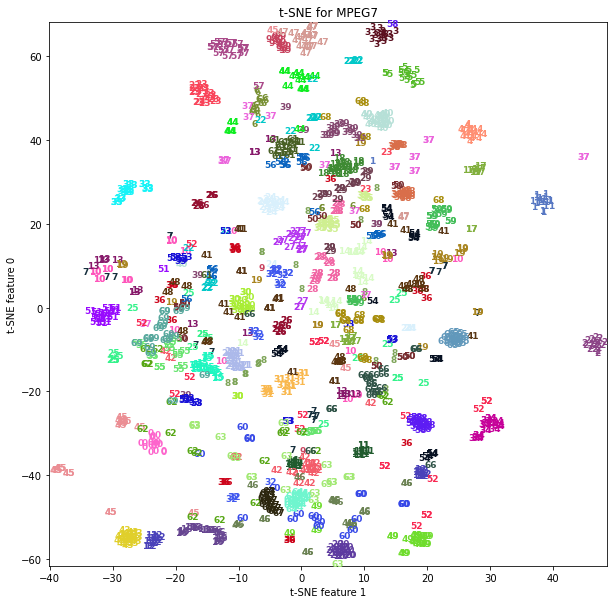

NAME                 NUMBER     COUNT
Bone                 0          20   
Comma                1          20   
Glas                 2          20   
HCircle              3          20   
Heart                4          20   
Misk                 5          20   
apple                6          20   
bat                  7          20   
beetle               8          20   
bell                 9          20   
bird                 10         20   
bottle               11         20   
brick                12         20   
butterfly            13         20   
camel                14         20   
car                  15         20   
carriage             16         20   
cattle               17         20   
cellular             18         20   
chicken              19         20   
children             20         20   
chopper              21         20   
classic              22         20   
crown                23         20   
cup                  24         20   
deer        

In [120]:
tSNE_MPEG7()